# Some Visualisations

N = 2 ^ 6 = 64
norm(Di * u) = 4.23995640477172e-14



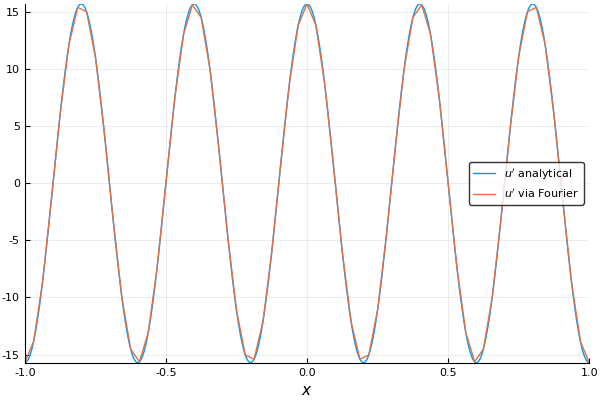

In [2]:
using Revise, SummationByPartsOperators
using Plots, LaTeXStrings; pyplot()

xmin = -1.0
xmax = 1.0
@show N = 2^6

factor=5; ufunc(x) = sinpi(factor*x); dufunc(x) = factor*π*cospi(factor*x)
#factor=5; ufunc(x) = exp(sinpi(factor*x)); dufunc(x) = ufunc(x)*factor*π*cospi(factor*x)


function compute(D, Di)
    u = compute_coefficients(ufunc, D)
    du = D*u

    @show norm(Di*u)

    xplot, duplot = evaluate_coefficients(du, D)
end

x = linspace(xmin, xmax, 10^3)
plot(x, dufunc.(x), label="\$u'\$ analytical", xguide=L"x")

D = fourier_derivative_operator(xmin, xmax, N)
Di = spectral_viscosity_operator(Tadmor1989(), D)
plot!(compute(D, Di)..., label="\$u'\$ via Fourier")
#=
D = periodic_derivative_operator(1, 2, xmin, xmax, N)
Di = periodic_derivative_operator(2, 2, xmin, xmax, N) #TODO
plot!(compute(D, Di)..., label="\$u'\$ via 2nd order FD")

D = periodic_derivative_operator(1, 4, xmin, xmax, N)
Di = periodic_derivative_operator(2, 4, xmin, xmax, N) #TODO
plot!(compute(D, Di)..., label="\$u'\$ via 4th order FD")

D = periodic_derivative_operator(1, 8, xmin, xmax, N)
Di = periodic_derivative_operator(2, 8, xmin, xmax, N) #TODO
plot!(compute(D, Di)..., label="\$u'\$ via 8th order FD")

D = periodic_derivative_operator(1, 16, xmin, xmax, N)
Di = periodic_derivative_operator(2, 16, xmin, xmax, N) #TODO
plot!(compute(D, Di)..., label="\$u'\$ via 16th order FD")
=#


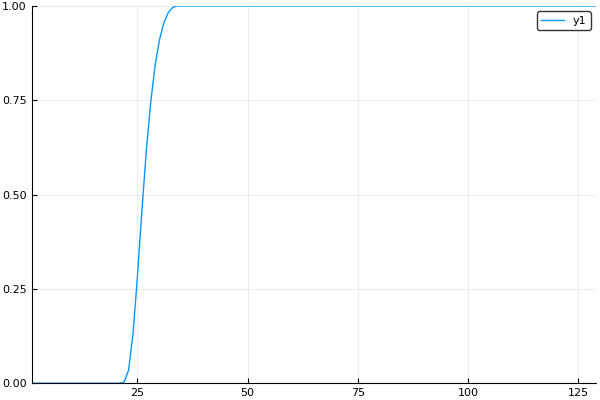

In [78]:
N = 2^8
D = fourier_derivative_operator(0., 1., N)

#Di = spectral_viscosity_operator(Tadmor1989(), D)
#Di = spectral_viscosity_operator(MadayTadmor1989(), D)
#Di = spectral_viscosity_operator(TadmorWaagan2012Standard(), D)
Di = spectral_viscosity_operator(TadmorWaagan2012Convergent(), D)

c = Di.coefficients / (Di.strength * D.jac^2 * N)
plot(-c ./ linspace(eps(),length(c)-1,length(c)).^2)

# Benchmarks

In [ ]:
using Revise, SummationByPartsOperators, BenchmarkTools

xmin = -1.0
xmax = 1.0
N = 128

factor=5; ufunc(x) = sinpi(factor*x); dufunc(x) = factor*π*cospi(factor*x)
#factor=10; ufunc(x) = exp(sinpi(factor*x)); dufunc(x) = ufunc(x)*factor*π*cospi(factor*x)

D = fourier_derivative_operator(xmin, xmax, N)
Di = spectral_viscosity_operator(D)

u = compute_coefficients(ufunc, D)
res = D*u

xplot, duplot = evaluate_coefficients(res, D)
@printf("Error: %.3e \n", maximum(abs, duplot - dufunc.(xplot)))
sleep(0.1)
display(@benchmark A_mul_B!(res, D, u))
display(@benchmark A_mul_B!(res, Di, u))

In [ ]:
display(@benchmark A_mul_B!(res, D, u))
display(@benchmark A_mul_B!(res, Di, u))